This code plots **Figure 1: Regime diagram (experiment codes on wind speed versus mountain halfwidth)**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

from matplotlib.lines import Line2D
import matplotlib.patches as mpatches
from IPython.display import display, clear_output, HTML, Image

plt.rc('axes', linewidth=2)
plt.rcParams['font.size'] = '20'
from matplotlib.ticker import ScalarFormatter

In [2]:
df = pd.read_csv('../valid_tests.csv')
df

,Test_name,U(m/s),L0(km),H0(m)
0,B1high,5,1.60,16.0
1,B2mid,5,3.14,31.4
2,B2high,10,3.14,31.4
3,B3low,5,6.28,62.8
4,B3mid,10,6.28,62.8
5,B3high,20,6.28,62.8
6,B4vlow,5,12.56,125.6
7,B4low,10,12.56,125.6
8,B4mid,20,12.56,125.6
9,B4high,40,12.56,125.6


In [3]:
N0 = 0.0187 # Brunt–Väisälä frequency (1/s)
df['Fr'] = df['U(m/s)']/df['H0(m)']/N0
df["Fr_rounded"] = np.floor(df["Fr"])
df

,Test_name,U(m/s),L0(km),H0(m),Fr,Fr_rounded
0,B1high,5,1.60,16.0,16.711230,16.0
1,B2mid,5,3.14,31.4,8.515276,8.0
2,B2high,10,3.14,31.4,17.030553,17.0
3,B3low,5,6.28,62.8,4.257638,4.0
4,B3mid,10,6.28,62.8,8.515276,8.0
5,B3high,20,6.28,62.8,17.030553,17.0
6,B4vlow,5,12.56,125.6,2.128819,2.0
7,B4low,10,12.56,125.6,4.257638,4.0
8,B4mid,20,12.56,125.6,8.515276,8.0
9,B4high,40,12.56,125.6,17.030553,17.0


In [4]:
markers = ['o', 's', 'X', '^', 'D', 'P']  # Adjust for the number of unique L0
tableau_colors = mcolors.TABLEAU_COLORS
colors = list(tableau_colors.keys())[:5]  # Adjust for the number of unique Fr
tnames=["B1"]*len(df)                     # test_names
tstrength = ["    "]*len(df)              # test_strength based on Fr0

fr = [1]*len(df)
for i in range(len(df)):
        if df.at[i,'Test_name'][2:] == "vvlow":
            df.at[i,'color'] = colors[0]
        elif df.at[i,'Test_name'][2:] == "vlow":
            df.at[i,'color'] = colors[1]
        elif df.at[i,'Test_name'][2:] == "low":
            df.at[i,'color'] = colors[2]
        elif df.at[i,'Test_name'][2:] == "mid":
            df.at[i,'color'] = colors[3]
        else:
            df.at[i,'color'] = colors[4]
        ################################    
        if df.at[i,'Test_name'][:2] == "B1":
            df.at[i,'marker'] = markers[0]
        elif df.at[i,'Test_name'][:2] == "B2":
            df.at[i,'marker'] = markers[1]
        elif df.at[i,'Test_name'][:2] == "B3":
            df.at[i,'marker'] = markers[2]
        elif df.at[i,'Test_name'][:2] == "B4":
            df.at[i,'marker'] = markers[3]
        elif df.at[i,'Test_name'][:2] == "B5":
            df.at[i,'marker'] = markers[4]
        else:
            df.at[i,'marker'] = markers[5]
    ##################################    
        tnames[i] = df.at[i,'Test_name'][:2]
        tstrength[i] = df.at[i,'Test_name'][2:]
        fr[i] = df.at[i,'Fr_rounded']
    ##################################
    
tnames = sorted(list(set(tnames))) # Removing duplicates by first changing to a set and then back to a list
tstrength = sorted(list(set(tstrength)), reverse=True)# Removing duplicates by first changing to a set and then back to a list
tstrength[2], tstrength[3] = tstrength[3], tstrength[2]
fr = sorted(list(set(fr)))

Setting up the variables for the plot

In [5]:
x = np.arange(0,6,1) # X-axis range
y = np.arange(0,4,1) # Y-axis range

unique_u_values = df["U(m/s)"].unique() # X-axis labels
unique_L_values = df["L0(km)"].unique() # Y-axis labels

# Create legend entries for markers (test names)
marker_legend = [
    Line2D([0], [0], marker=marker, color='w', label=f'Test: {name}', 
           markerfacecolor='black', markersize=10, linestyle='None',alpha=0.6)
    for name, marker in zip(tnames, markers)]

# Create legend entries for colors (Fr labels)
color_legend = [
    mpatches.Patch(color=color, label=f'{label}')
    for label, color in zip(tstrength[::-1], colors[::-1])]

# Combine marker and color legends
legend_elements = color_legend + marker_legend 

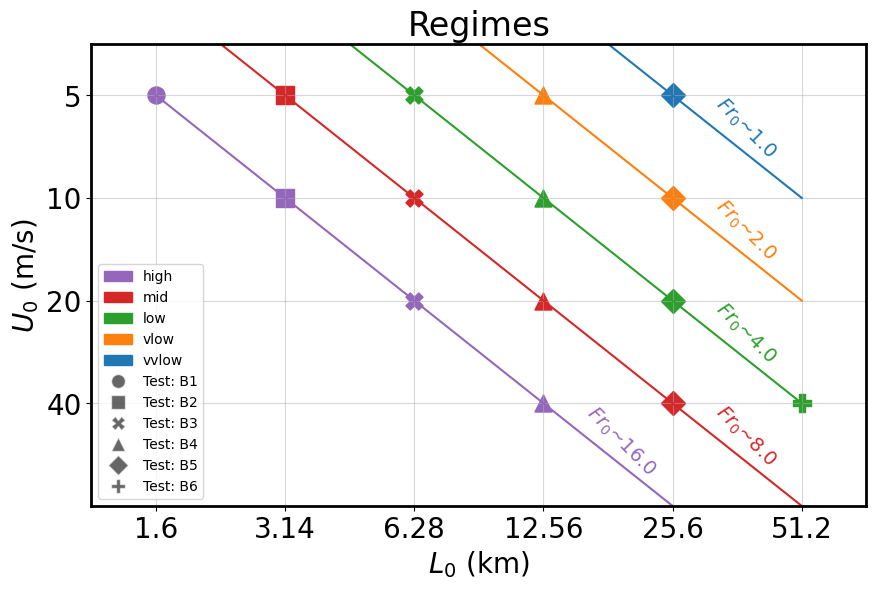

In [6]:
k =0

fig, ax = plt.subplots(figsize=(10, 6))
for i in x[:5]:
    for j in y:
        if (i>=j):
            ax.scatter(i, j, color=df.at[k,'color'], s=150, marker=df.at[k,'marker'])
            k =k+1            
    ax.plot(x-i,c = colors[-i-1])  
    if i !=4:
        ax.text(4.3, 0.6+i , "$Fr_0$~"+str(fr[i]), color=colors[::-1][-i-1], rotation=-45, fontsize=14)
    else:
        ax.text(3.3, -0.3+i , "$Fr_0$~"+str(fr[i]), color=colors[::-1][-i-1], rotation=-45, fontsize=14)    
ax.scatter(5, 3, color=df.at[k,'color'], s=150, marker=df.at[k,'marker'])   

ax.set_xlim([-0.5, 5.5])
ax.set_ylim([-0.5, 4])
ax.set_xticks(x,unique_L_values)
ax.set_yticks(y,unique_u_values)
plt.gca().invert_yaxis()
plt.grid(True,alpha=0.5)
ax.set_xlabel("$L_0$ (km)")
ax.set_ylabel("$U_0$ (m/s)")
ax.set_title('Regimes')
ax.legend(handles=legend_elements, loc="lower left", fontsize=10)
plt.show()
#plt.savefig('../article_figs/figure1_regimes.png',bbox_inches='tight')
